In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [16]:
# importing data from CSV
df = pd.read_csv('fullCleanData2.csv')
loan_data = pd.read_csv('fullCleanData2.csv')
loan_data

,Unnamed: 0,LoanNumber,CountryCode,Country,Borrower,GuarantorCountryCode,LoanStatus,InterestRate,ProjectID,OriginalPrincipalAmount,...,timeToRepay,export,employemt,easeOfBusiness,education,electricity,ignore,CurrentGDP,incomePC,gdpRate
0,0,IBRD71610,EG,"Egypt, Arab Republic of",Ministry of International Cooperation,EG,Cancelled,0.00,P074075,1.235000e+07,...,7,5.380000e+10,23.000000,0,0.000000,1446.626135,892.821050,1.628182e+11,1674.739502,7.157617
1,1,IBRD45990,UA,Ukraine,Ministry of Finance,UA,Cancelled,5.14,P055738,2.819000e+07,...,9,5.023901e+10,24.000000,0,0.000000,3399.522311,2935.292315,1.077531e+11,1900.247885,7.300000
2,2,IBRD71880,MX,Mexico,Secretaria De Hacienda Y Credito Publico,MX,Cancelled,0.00,P068290,5.840000e+07,...,7,3.072357e+11,25.900000,0,50.175091,1995.437183,1580.662138,1.101275e+12,8216.923739,1.400290
3,3,IBRDS0010,GN,Guinea,Ministry of Economy and Finance,GN,Cancelled,6.00,P001018,1.700000e+06,...,47,0.000000e+00,0.000000,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
4,4,IBRDS0020,TN,Tunisia,Ministtry of Investments and Intl. Co-op,TN,Cancelled,6.50,P005598,8.500000e+05,...,44,4.061962e+08,0.000000,0,0.000000,155.238347,320.077113,1.685217e+09,293.820234,10.560197
5,5,IBRDB0040,BR,Brazil,Minist?o da Fazenda,BR,Cancelled,0.00,P006329,7.700000e+06,...,22,4.598317e+10,20.500000,0,0.000000,1534.817563,941.624461,4.377986e+11,2470.634201,4.665169
6,6,IBRDB0050,PY,Paraguay,Ministerio de Hacienda,PY,Cancelled,0.00,P007879,3.804000e+06,...,21,4.787160e+09,19.000000,0,0.000000,702.825600,770.822095,7.870982e+09,0.000000,5.317920
7,7,IBRDB0051,PY,Paraguay,Ministerio de Hacienda,PY,Cancelled,0.00,P007879,3.317000e+06,...,21,4.787160e+09,19.000000,0,0.000000,702.825600,770.822095,7.870982e+09,0.000000,5.317920
8,8,IBRDB0100,CL,Chile,MINIS. DE HACIENDA,CL,Cancelled,0.00,P006610,1.500000e+08,...,19,2.079407e+10,26.000000,0,0.000000,1938.428562,1401.314652,7.803957e+10,4199.792555,6.802917
9,9,IBRD43170,VE,"Venezuela, Republica Bolivariana de",MINISTERIO DE FINANZAS,VE,Cancelled,4.89,P041807,8.000000e+06,...,12,2.830842e+10,26.600000,0,0.000000,2632.079149,2047.272510,8.362063e+10,2763.185752,-7.755300


In [4]:
# Cleaning Data
loan_data['LoanStatus']= loan_data['LoanStatus'].str.replace(' ', '_')
loan_data["Borrower"] = loan_data["Borrower"].str.lower()
loan_data["LoanStatus"] = loan_data["LoanStatus"].str.lower()

In [5]:
# Sample the data 
from sklearn.model_selection import train_test_split
loan_X = loan_data[["InterestRate","CurrentGDP",
                    "OriginalPrincipalAmount",
                    "employemt","export",
                    "timeToRepay","electricity",
                    "incomePC","gdpRate"]]

loan_Y = loan_data['LoanStatus']

loan_X_train, loan_X_test, loan_Y_train, loan_Y_test = train_test_split(loan_X, loan_Y, test_size=.7)
loan_Y_train = pd.get_dummies(loan_Y_train)
loan_Y_test = pd.get_dummies(loan_Y_test)
loan_X_train 
loan_Y_train

,cancelled,fully_repaid
89300,0,1
15073,0,1
59804,0,1
37355,0,1
11867,0,1
100319,0,1
76473,0,1
46311,0,1
98438,0,1
49878,0,1


# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# fit model
logreg.fit(loan_X_train, loan_Y_train['fully_repaid'])
y_pred_class = logreg.predict(loan_X_test)

In [7]:
from sklearn import metrics
print(metrics.accuracy_score(loan_Y_test['fully_repaid'], y_pred_class))

0.870694067666


In [8]:
logreg.predict(loan_X_test)[0:80]
logreg.predict_proba(loan_X_test)[0:80]
logreg.predict_proba(loan_X_test)[0:80, 1]
y_pred_prob = logreg.predict_proba(loan_X_test)[:, 1]
print(metrics.roc_auc_score(loan_Y_test['fully_repaid'], y_pred_prob))

0.476998751663


In [9]:
fpr, tpr, thresholds = metrics.roc_curve(loan_Y_test['fully_repaid'], y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


## KNN

In [ ]:
# KNN Accuracy is good 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(loan_X_train, loan_Y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
loan_Y_pred = knn.predict(loan_X_test)
loan_Y_pred_df=pd.DataFrame(loan_Y_pred, columns=['cancelled','fully_repaid'])

print(accuracy_score(loan_Y_test, loan_Y_pred))
#y_pred_val = neigh.predict(X_val)
#print (accuracy_score(loan_Y_test.to_matrix(), loan_Y_pred))


knn.get_metric()

In [11]:
loan_Y_test_matrix = loan_Y_test.as_matrix()
#|loan_Y_pred
loan_Y_test_matrix
loan_Y_pred
loan_Y_test_matrix[9][1]


1

# # Random tree classifier

In [12]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X = loan_X_train.as_matrix()
Y = loan_Y_train
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)


In [13]:
loan_Y_pred =clf.predict(loan_X_test)
print('Accuracy on the training subset: {:.3f}'.format(clf.score(loan_X_train, loan_Y_train)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(loan_X_test, loan_Y_test)))
y_score = clf.score(loan_X_test, loan_Y_test)
y_score

Accuracy on the training subset: 0.999
Accuracy on the test subset: 0.998


0.99767108563238982

## DecisionTreeClassifier  

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree


tre = DecisionTreeClassifier(random_state=0)
tre = tre.fit(loan_X_train, loan_Y_train)

print('Accuracy on the training subset: {:.3f}'.format(tre.score(loan_X_train, loan_Y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tre.score(loan_X_test, loan_Y_test)))


Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.996


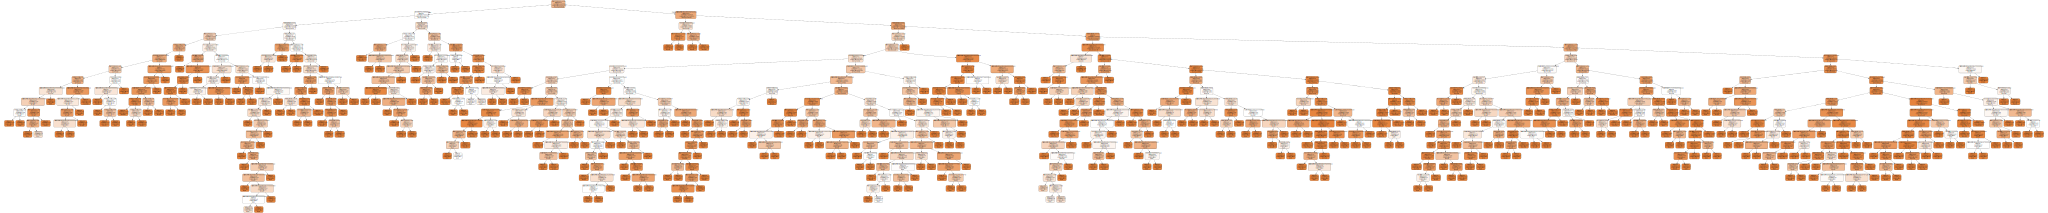

In [15]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tre, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("loan") 
dot_data = tree.export_graphviz(tre, out_file=None,
                                feature_names=list(loan_X_train.columns.values),
                                class_names=list(loan_Y_train.columns.values),
                                filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)  
graph